In [1]:
%matplotlib inline
import numpy as np
import GP_regressors
import QGP_regressors
import scipy 

import matplotlib.pyplot as plt
## latex font
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 15})

In [2]:
##This function makes the plots easy  
def plot_with_uncertainty(Xp, mu, Sigma, color='r', title="", name = "Mean", linewidth=2.0, linestyle='-', marker = None):
    
    mean, std = mu.ravel(), np.sqrt(np.diag(Sigma))

    # plot distribution
    plt.plot(Xp, mean, color=color,  label=name, linewidth=linewidth, linestyle=linestyle, marker = marker)
    plt.fill_between(Xp.ravel(), mean - 2*std, mean + 2*std, color=color, alpha=0.25)
    
    plt.title(title)

## Regression with Quantum Hilbert space

### Polynomial $f(x) =$ Sine function, $M = 4$.

In [15]:
## Problem definition
## initial point
x_i = -np.pi
x_f = np.pi

X_real = np.linspace(start=x_i, stop=x_f, num=1000).reshape(-1, 1)
y = np.squeeze(np.sin(X_real))

## Points where we want to evaluate the function
Xp = np.linspace(start=x_i, stop=x_f, num=30).reshape(-1, 1)

## Number of trainning points
np.random.seed(24)
N_train =2**4

## Here some points of the function are randomnly chosen
training_indices = np.random.choice(np.arange(y.size), size=N_train, replace=False)
X_train, y_t = X_real[training_indices], y[training_indices]

## Noise addition, this is noise in the measurements
noise_std = 0.1
y_train = y_t + np.random.normal(0.0, noise_std, size=y_t.shape)

sigma2 = noise_std**2

A:  (8, 8)
Phisf:  (8, 30)
Phif:  (16, 8)


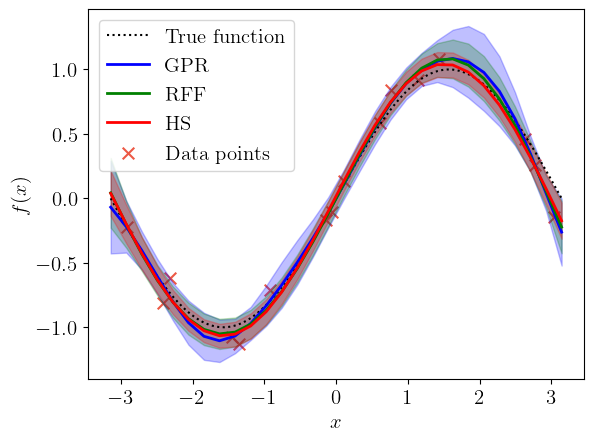

<Figure size 640x480 with 0 Axes>

In [16]:
#Models for regression
alpha = 1.5
scale = 1.0
M = 2**2
L = 2*np.pi


## Exponential kernel regression
GK = GP_regressors.Gaussian_kernel_GPR((X_train, y_train),sigma2=sigma2, alpha=alpha, scale=scale)

##Lazaro gredilla regression
LG = GP_regressors.LP_approx_GPR((X_train, y_train),sigma2=sigma2,M=M, alpha=alpha, scale=scale)

## Hilbert Space approximation regression
HS = GP_regressors.HS_approx_GPR((X_train, y_train),
                    sigma2=sigma2,
                    M = M,
                    L = L,
                    alpha=alpha,
                    scale=scale)

mu_post_exp_k, Sigma_post_exp_k = GK.posterior(Xp)
mu_post_approx_LG_k, Sigma_post_approx_LG_k = LG.posterior(Xp)
mu_post_approx_HS_k, Sigma_post_approx_HS_k = HS.posterior(Xp)


## Plotting
plt.plot(X_real, y, label="True function", linestyle="dotted", color='k')
plot_with_uncertainty(Xp, mu_post_exp_k, Sigma_post_exp_k, color='blue', name = "GPR")
plot_with_uncertainty(Xp, mu_post_approx_LG_k, Sigma_post_approx_LG_k, color='green', name = "RFF")
plot_with_uncertainty(Xp, mu_post_approx_HS_k, Sigma_post_approx_HS_k, color='red', name = "HS")

plt.scatter(X_train, y_train, marker='x', label="Data points", color='#e82f17',zorder=0, s = 70, alpha=0.8)

plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()

plt.show()
plt.tight_layout()
plt.savefig("GPR_exp_kernel_ex2.pdf", bbox_inches='tight')


In [17]:
Phif_RFF = LG.Phi_matrix(X_train)
Phisf_RFF = LG.Phi_matrix(Xp).T


Z_RFF = np.array(Phif_RFF)
Zs_RFF =np.array(Phisf_RFF.T)

## Normalize the data
norm_z_RFF = np.linalg.norm(Z_RFF)

Z_norm_RFF = Z_RFF/norm_z_RFF

ZZd_RFF = np.array(Z_norm_RFF.T @ Z_norm_RFF)

real_eigenvals, real_eigenvecs = scipy.linalg.eig(ZZd_RFF)
real_eigenvals = np.sort(real_eigenvals)[::-1]


'''
The delta parameter is important for accurately estimating the eigenvalues. The performance of the algorithm
is very sensitive to the choice of delta. The delta parameter should be 1>delta>lam_max, 
for demonstrations purposes we choose delta = lam_max + 0.012
'''

delta_RFF =np.real(real_eigenvals[0])+0.011


In [18]:
Zs_RFF.shape

(30, 8)

(16, 8)
X:  (16, 8)
XXd:  (8, 8)
psi:  (128,)
n_psi:  7
Real eigenvalues:  [4.09570485e-01+0.j 2.57465973e-01+0.j 1.88927210e-01+0.j
 1.19669275e-01+0.j 2.32314654e-02+0.j 1.13114243e-03+0.j
 4.34483285e-06+0.j 1.03668648e-07+0.j]
Quantum eigenvalues:  [0.40958390230354436, 0.25746594009178675, 0.1889281474651596, 0.11967160645143668, 0.02325664423959709, 0.0011294617511504105, 5.1339170506836844e-05]
Point:  1  of  30  done.
Point:  2  of  30  done.
Point:  3  of  30  done.
Point:  4  of  30  done.
Point:  5  of  30  done.
Point:  6  of  30  done.
Point:  7  of  30  done.
Point:  8  of  30  done.
Point:  9  of  30  done.
Point:  10  of  30  done.
Point:  11  of  30  done.
Point:  12  of  30  done.
Point:  13  of  30  done.
Point:  14  of  30  done.
Point:  15  of  30  done.
Point:  16  of  30  done.
Point:  17  of  30  done.
Point:  18  of  30  done.
Point:  19  of  30  done.
Point:  20  of  30  done.
Point:  21  of  30  done.
Point:  22  of  30  done.
Point:  23  of  30  done.
Point:

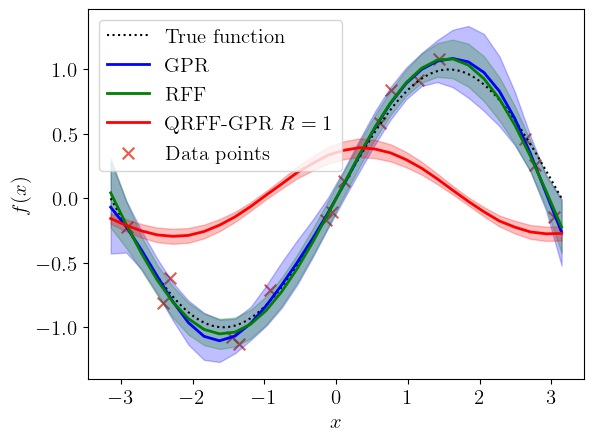

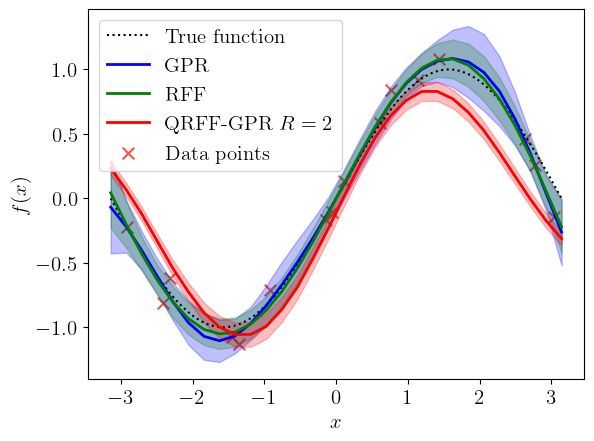

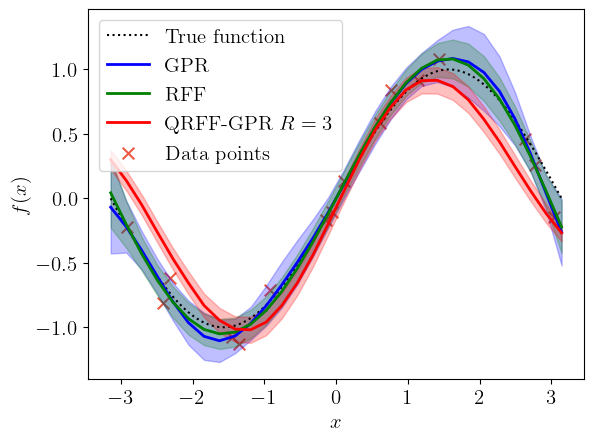

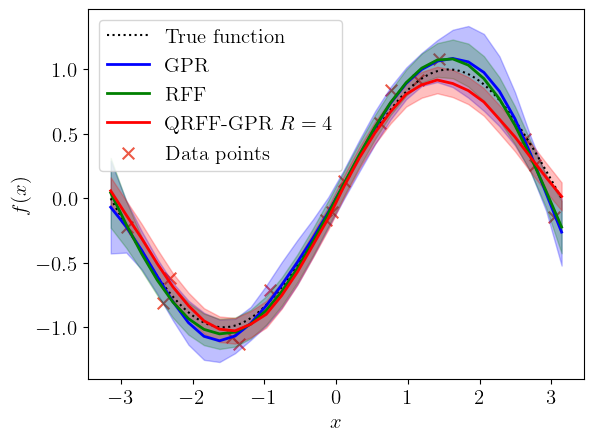

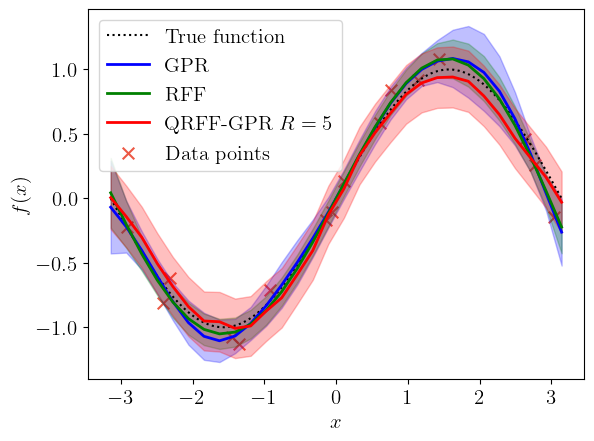

In [19]:
'''
The number of qubit registers for the eigenvalue estimation is also an important parameter
in order to obtain a good approximation of the mean and variance of the GPR.
We can increase the number of qubits to obtain the desired result.
'''

n_eig=13
shots = 1000000

## estimate for R = 1,2,3,4,5
for R in [1,2,3,4,5]:
    ## Quantum Hilbert Space approximation regression
    mean_args_post = [X_train, y_train, sigma2, M, alpha, scale, delta_RFF, n_eig, R, shots]
    mu_post_approx_LG_k_QPU, Sigma_post_approx_LG_k_QPU = QGP_regressors.QGPR_RFF_posterior(Xp,mean_args=mean_args_post)
    Sigma_post_approx_LG_k_QPU = np.diag(Sigma_post_approx_LG_k_QPU)

    ## save the data in a txt file in columns, just the diagonal of the covariance matrix
    np.savetxt("Data/QA_RFF_GPR_R{}_M{}_example_2.txt".format(R,M),
                np.c_[Xp, mu_post_exp_k, np.diag(Sigma_post_exp_k),
                mu_post_approx_LG_k, np.diag(Sigma_post_approx_LG_k),
                mu_post_approx_LG_k_QPU, np.diag(Sigma_post_approx_LG_k_QPU)], delimiter=",")

    ## plot the results in independent figures
    plt.figure()
    plt.plot(X_real, y, label="True function", linestyle="dotted", color='k')
    plot_with_uncertainty(Xp, mu_post_exp_k, Sigma_post_exp_k, color='blue', name = "GPR")
    plot_with_uncertainty(Xp, mu_post_approx_LG_k, Sigma_post_approx_LG_k, color='green', name = "RFF")
    plot_with_uncertainty(Xp, mu_post_approx_LG_k_QPU, Sigma_post_approx_LG_k_QPU, color='red', name = "QRFF-GPR $R={}$".format(R))

    plt.scatter(X_train, y_train, marker='x', label="Data points", color='#e82f17',zorder=0, s = 70, alpha=0.8)
    plt.xlabel("$x$")
    plt.ylabel("$f(x)$")
    plt.legend()

    plt.savefig("Figures/QA_RFF_GPR_R{}_M{}_example_2.pdf".format(R,M), bbox_inches='tight')

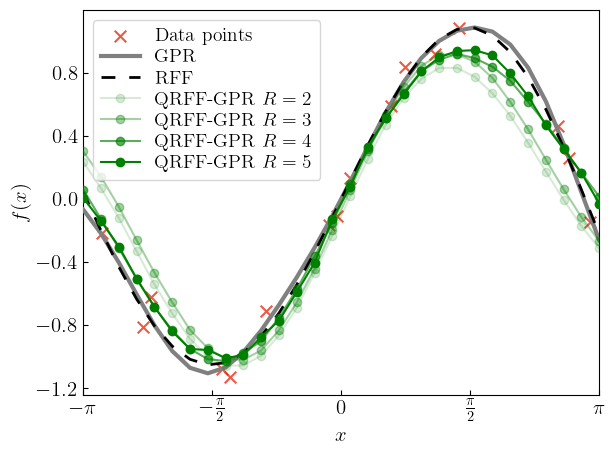

In [20]:
## colors for the plots
color_GPR = 'gray'
color_RFF = 'k'

## Blue shades
shades = ['#97dffc', '#3f8efc', 'green', '#0000ff']

R = 2

data = np.loadtxt("Data/QA_RFF_GPR_R{}_M{}_example_2.txt".format(R,M), delimiter=",")

## Plotting
plt.figure()
plt.scatter(X_train, y_train, marker='x', label="Data points", color='#e82f17',zorder=0, s = 70, alpha=0.8)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.plot(data[:,0], data[:,1], color=color_GPR, label="GPR", linewidth=3,zorder=5)

plt.tick_params(direction='in')

#plt.ylim(-1.2,1.2)
plt.xlim(-np.pi,np.pi)

plt.yticks(np.arange(-1.2, 1.3, step=0.4))
tick_pos= [-np.pi , -np.pi/2, 0 , np.pi/2, np.pi]
labels = [r'$-\pi$', r"$-\frac{\pi}{2}$", r"$0$", r"$\frac{\pi}{2}$", r"$\pi$"]
plt.xticks(tick_pos, labels)

plt.tight_layout()

plt.savefig("Figures/mean_GPR_example_1.pdf",  pad_inches = 0, bbox_inches='tight')
## linestyle dashed more spaced
plt.plot(data[:,0], data[:,3], color=color_RFF, label="RFF",zorder=5, ls = '--', dashes=(5, 5), linewidth = 2.)


## place legend left 0.2 units
plt.legend(bbox_to_anchor=(0.02, 0.98), loc='upper left', fontsize = 14, borderaxespad=0.,ncol=1,labelspacing=0.2,  columnspacing=0.6)

plt.tight_layout()
plt.savefig("Figures/mean_RFF_GPR_example_2.pdf",  pad_inches = 0, bbox_inches='tight')


Rs = [2,3,4,5]
for R in Rs:
    data = np.loadtxt("Data/QA_RFF_GPR_R{}_M{}_example_2.txt".format(R,M), delimiter=",")
    plt.plot(data[:,0], data[:,5], 'o-', label="QRFF-GPR $R={}$".format(R), color="green", alpha=(R/max(Rs))**2, zorder=5)
    ## place legend left 0.2 units
    #plt.legend(bbox_to_anchor=(0.02, 0.98), loc='upper left', fontsize = 14, borderaxespad=0.,ncol=1,labelspacing=0.2,  columnspacing=0.6)
    plt.legend(fontsize = 14,ncol=1,labelspacing=0.2,  columnspacing=0.6)
    plt.tight_layout()
    plt.savefig("Figures/mean_QA_RFF_GPR_R{}_example_2.pdf".format(R),  pad_inches = 0, bbox_inches='tight')

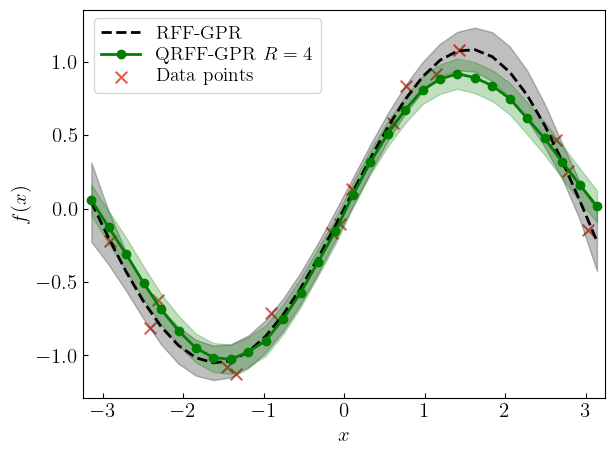

In [21]:
## plot te result with R = 4
R = 4
data_RFF = np.loadtxt("Data/QA_RFF_GPR_R{}_M{}_example_2.txt".format(R,M), delimiter=",")

#plot_with_uncertainty(Xp, data_RFF[:,1], np.diag(data_RFF[:,2]), color="gray", name = "GPR", linestyle='-', linewidth=4.0)
plot_with_uncertainty(Xp, data_RFF[:,3], np.diag(data_RFF[:,4]), color="k", name = "RFF-GPR", linestyle='--')
plot_with_uncertainty(Xp, data_RFF[:,5], np.diag(data_RFF[:,6]), color="green", name = "QRFF-GPR $R={}$".format(R), linestyle='-', marker='o')
plt.scatter(X_train, y_train, marker='x', label="Data points", color='#e82f17',zorder=0, s = 70, alpha=0.8)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()


## place ticks inside figure
plt.tick_params(direction='in')

## place legend left 0.2 units
plt.legend(bbox_to_anchor=(0.02, 0.98), loc='upper left', fontsize = 14, borderaxespad=0.,ncol=1,labelspacing=0.2,  columnspacing=0.6)

#plt.ylim(-1.2,1.2)
plt.xlim(-np.pi-0.1,np.pi+0.1)

plt.tight_layout()

plt.savefig("Figures/mean_and_variance_QA_RFF_GPR_R{}_example_2.pdf".format(R),  pad_inches = 0, bbox_inches='tight')

plt.show()

## Regression with Quantum Hilbert space

In [22]:
Phif_HS = HS.Phi_matrix(X_train)
Lambda_HS = HS.Lambda()
Phisf_HS = HS.Phi_matrix(Xp).T


Z_HS = np.array(Phif_HS @ np.sqrt(Lambda_HS))
Zs_HS =np.array(Phisf_HS.T @ np.sqrt(Lambda_HS))

## Normalize the data
norm_z_HS = np.linalg.norm(Z_HS)

Z_norm_HS = Z_HS/norm_z_HS

ZZd_HS = np.array(Z_norm_HS.T @ Z_norm_HS)

real_eigenvals, real_eigenvecs = scipy.linalg.eig(ZZd_HS)
real_eigenvals = np.sort(real_eigenvals)[::-1]


'''
The delta parameter is important for accurately estimating the eigenvalues. The performance of the algorithm
is very sensitive to the choice of delta. The delta parameter should be 1>delta>lam_max, 
for demonstrations purposes we choose delta = lam_max + 0.012
'''

delta_HS =np.real(real_eigenvals[0])+0.012

Real eigenvalues:  [0.51905967+0.j 0.11557984+0.j 0.03150868+0.j 0.33385182+0.j]
Quantum eigenvalues:  [0.5190667436102334, 0.33385709124424906, 0.11558586285213517, 0.03150573715431166]
{'0': 497759, '1': 502241}
{'0 0': 327737, '0 1': 267863, '1 1': 232313, '1 0': 172087}
Point:  1  of  30  done.
{'1': 502820, '0': 497180}
{'0 0': 340551, '0 1': 277729, '1 0': 160428, '1 1': 221292}
Point:  2  of  30  done.
{'0': 497122, '1': 502878}
{'0 1': 290176, '0 0': 351420, '1 0': 148811, '1 1': 209593}
Point:  3  of  30  done.
{'0': 496646, '1': 503354}
{'0 0': 358172, '0 1': 304409, '1 1': 194274, '1 0': 143145}
Point:  4  of  30  done.
{'1': 504490, '0': 495510}
{'0 1': 319533, '1 1': 180108, '0 0': 359259, '1 0': 141100}
Point:  5  of  30  done.
{'1': 505523, '0': 494477}
{'1 0': 144633, '0 1': 333651, '0 0': 355908, '1 1': 165808}
Point:  6  of  30  done.
{'0': 495438, '1': 504562}
{'0 1': 349439, '0 0': 349227, '1 0': 151286, '1 1': 150048}
Point:  7  of  30  done.
{'1': 506917, '0': 493

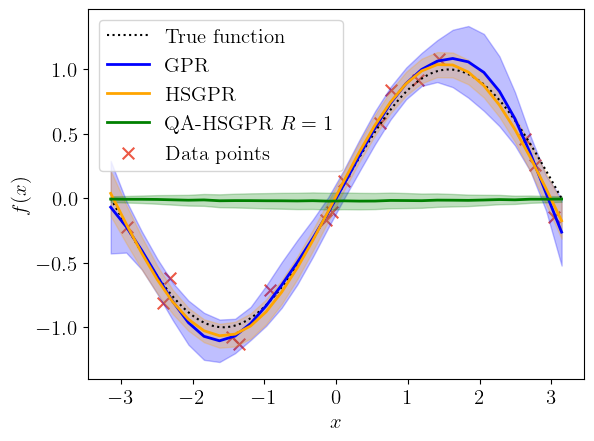

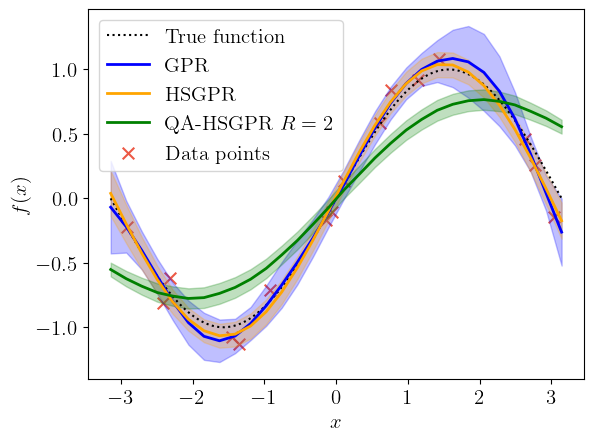

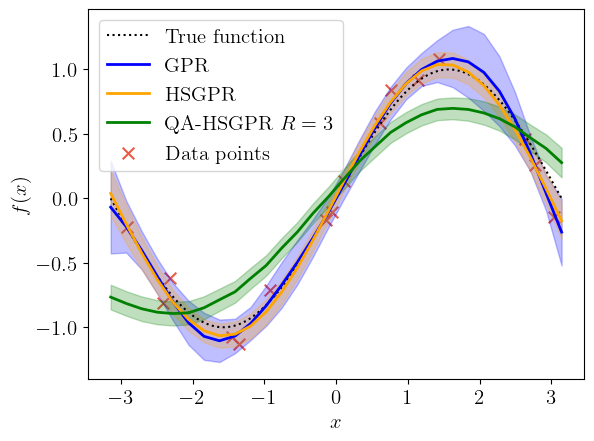

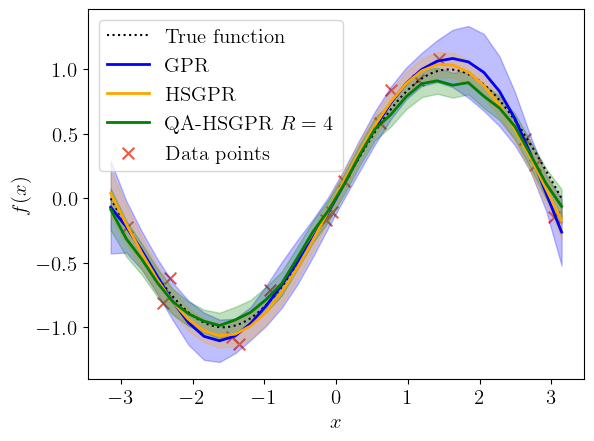

In [23]:
'''
The number of qubit registers for the eigenvalue estimation is also an important parameter
in order to obtain a good approximation of the mean and variance of the GPR.
We can increase the number of qubits to obtain the desired result.
'''

n_eig=13
shots = 1000000

## estimate for R = 1,2,3,4
for R in [1,2,3,4]:
    ## Quantum Hilbert Space approximation regression
    mean_args_post = [X_train, y_train, sigma2, M, L, alpha, scale, delta_HS, n_eig, R, shots]
    mu_post_approx_HS_k_QPU, Sigma_post_approx_HS_k_QPU = QGP_regressors.QGPR_HS_posterior(Xp,mean_args=mean_args_post)
    Sigma_post_approx_HS_k_QPU = np.diag(Sigma_post_approx_HS_k_QPU)

    ## save the data in a txt file in columns, just the diagonal of the covariance matrix
    np.savetxt("Data/QAHSGPR_R{}_M{}_example_2.txt".format(R,M),
                np.c_[Xp, mu_post_exp_k, np.diag(Sigma_post_exp_k),
                mu_post_approx_HS_k, np.diag(Sigma_post_approx_HS_k),
                mu_post_approx_HS_k_QPU, np.diag(Sigma_post_approx_HS_k_QPU)], delimiter=",")

    ## plot the results in independent figures
    plt.figure()
    plt.plot(X_real, y, label="True function", linestyle="dotted", color='k')
    plot_with_uncertainty(Xp, mu_post_exp_k, Sigma_post_exp_k, color='blue', name = "GPR")
    plot_with_uncertainty(Xp, mu_post_approx_HS_k, Sigma_post_approx_HS_k, color='orange', name = "HSGPR")
    plot_with_uncertainty(Xp, mu_post_approx_HS_k_QPU, Sigma_post_approx_HS_k_QPU, color='green', name = "QA-HSGPR $R={}$".format(R))

    plt.scatter(X_train, y_train, marker='x', label="Data points", color='#e82f17',zorder=0, s = 70, alpha=0.8)
    plt.xlabel("$x$")
    plt.ylabel("$f(x)$")
    plt.legend()

    plt.savefig("Figures/QAHSGP_R{}_M{}_example_2.pdf".format(R,M), bbox_inches='tight')

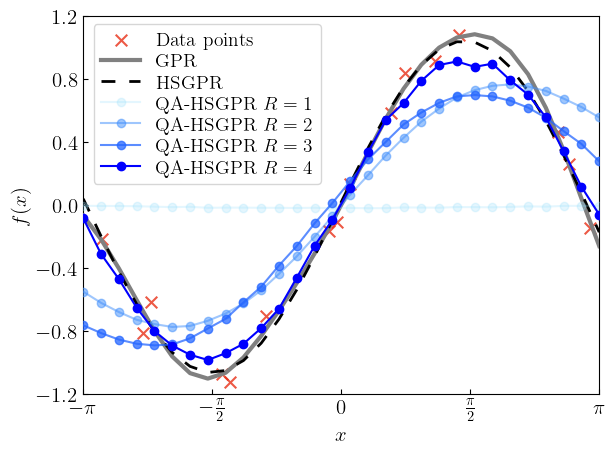

In [24]:
## colors for the plots
color_GPR = 'gray'
color_HSGPR = 'k'

## Blue shades
shades = ['#97dffc', '#3f8efc', '#2667ff', '#0000ff']

R = 2

data = np.loadtxt("Data/QAHSGPR_R{}_M{}_example_2.txt".format(R,M), delimiter=",")

## Plotting
plt.figure()
plt.scatter(X_train, y_train, marker='x', label="Data points", color='#e82f17',zorder=0, s = 70, alpha=0.8)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.plot(data[:,0], data[:,1], color=color_GPR, label="GPR", linewidth=3,zorder=5)

plt.tick_params(direction='in')

plt.ylim(-1.2,1.2)
plt.xlim(-np.pi,np.pi)

plt.yticks(np.arange(-1.2, 1.3, step=0.4))
tick_pos= [-np.pi , -np.pi/2, 0 , np.pi/2, np.pi]
labels = [r'$-\pi$', r"$-\frac{\pi}{2}$", r"$0$", r"$\frac{\pi}{2}$", r"$\pi$"]
plt.xticks(tick_pos, labels)

plt.tight_layout()

plt.savefig("Figures/mean_GPR_example_2.pdf",  pad_inches = 0, bbox_inches='tight')
## linestyle dashed more spaced
plt.plot(data[:,0], data[:,3], color=color_HSGPR, label="HSGPR",zorder=5, ls = '--', dashes=(5, 5), linewidth = 2.)


## place legend left 0.2 units
plt.legend(bbox_to_anchor=(0.02, 0.98), loc='upper left', fontsize = 14, borderaxespad=0.,ncol=1,labelspacing=0.2,  columnspacing=0.6)

plt.tight_layout()
plt.savefig("Figures/mean_HSGPR_example_2.pdf",  pad_inches = 0, bbox_inches='tight')


Rs = [1,2,3,4]
for R in Rs:
    data = np.loadtxt("Data/QAHSGPR_R{}_M{}_example_2.txt".format(R,M), delimiter=",")
    plt.plot(data[:,0], data[:,5], 'o-', label="QA-HSGPR $R={}$".format(R), color=shades[R-1], alpha=(R/max(Rs))**1, zorder=5)
    ## place legend left 0.2 units
    plt.legend(bbox_to_anchor=(0.02, 0.98), loc='upper left', fontsize = 14, borderaxespad=0.,ncol=1,labelspacing=0.2,  columnspacing=0.6)

    plt.tight_layout()
    plt.savefig("Figures/mean_QHSGPR_R{}_example_2.pdf".format(R),  pad_inches = 0, bbox_inches='tight')

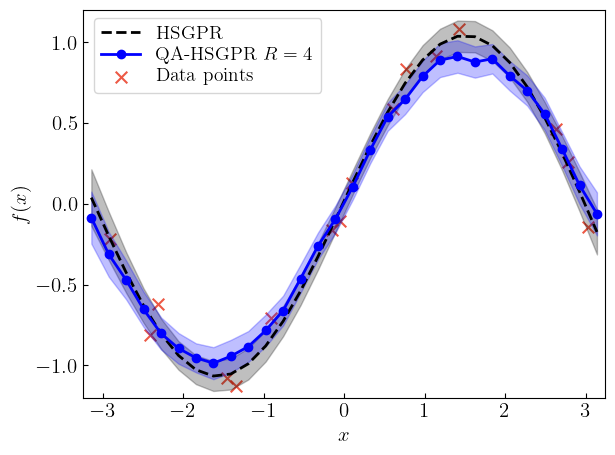

In [25]:
## plot te result with R = 4
R = 4
data_HS = np.loadtxt("Data/QAHSGPR_R{}_M{}_example_2.txt".format(R,M), delimiter=",")

#plot_with_uncertainty(Xp, data_HS[:,1], np.diag(data_HS[:,2]), color=color_GPR, name = "GPR", linestyle='-', linewidth=4.0)
plot_with_uncertainty(Xp, data_HS[:,3], np.diag(data_HS[:,4]), color="k", name = "HSGPR", linestyle='--')
plot_with_uncertainty(Xp, data_HS[:,5], np.diag(data_HS[:,6]), color="b", name = "QA-HSGPR $R={}$".format(R), linestyle='-', marker='o')
plt.scatter(X_train, y_train, marker='x', label="Data points", color='#e82f17',zorder=0, s = 70, alpha=0.8)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()


## place ticks inside figure
plt.tick_params(direction='in')

## place legend left 0.2 units
plt.legend(bbox_to_anchor=(0.02, 0.98), loc='upper left', fontsize = 14, borderaxespad=0.,ncol=1,labelspacing=0.2,  columnspacing=0.6)

plt.ylim(-1.2,1.2)
plt.xlim(-np.pi-0.1,np.pi+0.1)

plt.tight_layout()

plt.savefig("Figures/mean_and_variance_QHSGPR_R{}_example_2.pdf".format(R),  pad_inches = 0, bbox_inches='tight')

plt.show()

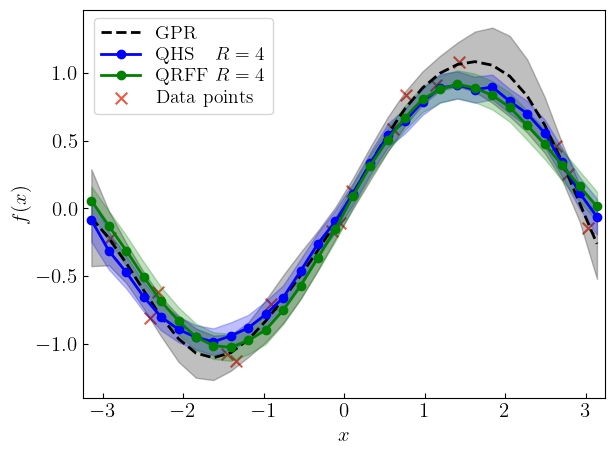

In [26]:
## plot te result with R = 4
R = 4
data_RFF = np.loadtxt("Data/QA_RFF_GPR_R{}_M{}_example_2.txt".format(R,M), delimiter=",")
data_HS = np.loadtxt("Data/QAHSGPR_R{}_M{}_example_2.txt".format(R,M), delimiter=",")

plot_with_uncertainty(Xp, data_HS[:,1], np.diag(data_HS[:,2]), color="k", name = "GPR\t", linestyle='--')
plot_with_uncertainty(Xp, data_HS[:,5], np.diag(data_HS[:,6]), color="b", name = r"QHS $\hspace{0.75em}" + "R={}$".format(R), linestyle='-', marker='o')
plot_with_uncertainty(Xp, data_RFF[:,5], np.diag(data_RFF[:,6]), color="green", name = "QRFF $R={}$".format(R), linestyle='-', marker='o')

plt.scatter(X_train, y_train, marker='x', label="Data points", color='#e82f17',zorder=0, s = 70, alpha=0.8)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()


## place ticks inside figure
plt.tick_params(direction='in')

## place legend left 0.2 units
plt.legend(bbox_to_anchor=(0.02, 0.98), loc='upper left', fontsize = 14, borderaxespad=0.,ncol=1,labelspacing=0.2,  columnspacing=0.6)

plt.xlim(-np.pi-0.1,np.pi+0.1)

plt.tight_layout()

plt.savefig("Figures/mean_and_variance_both_R{}_example_2.pdf".format(R),  pad_inches = 0, bbox_inches='tight')

plt.show()